<a href="https://colab.research.google.com/github/MonikSense/Traffic_Accident/blob/main/paper1trafficaccident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install xgboost lightgbm shap tensorflow networkx


Dataset Loaded: (840, 14)

XGBoost Accuracy: 0.6904761904761905
[LightGBM] [Info] Number of positive: 209, number of negative: 547
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 756, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.276455 -> initscore=-0.962115
[LightGBM] [Info] Start training from score -0.962115
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

/tmp/ipython-input-2849472698.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2849472698.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Accuracy: 0.6428571428571429
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5804 - loss: 0.6645 - val_accuracy: 0.7039 - val_loss: 0.6285
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6964 - loss: 0.6255 - val_accuracy: 0.7039 - val_loss: 0.6252
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7332 - loss: 0.5986 - val_accuracy: 0.7039 - val_loss: 0.6231
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7414 - loss: 0.5646 - val_accuracy: 0.7039 - val_loss: 0.6188
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7476 - loss: 0.5503 - val_accuracy: 0.7039 - val_loss: 0.6200
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7309 - loss: 0.5798 - val_accuracy: 0.7039 - val_loss: 0.6199
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6976 - loss: 0.5997 - val_accuracy: 0.7039 - val_loss: 0.6235
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7184 - loss: 0.5676 - val_accuracy: 0.7039 - val_loss: 0.6279
Ep

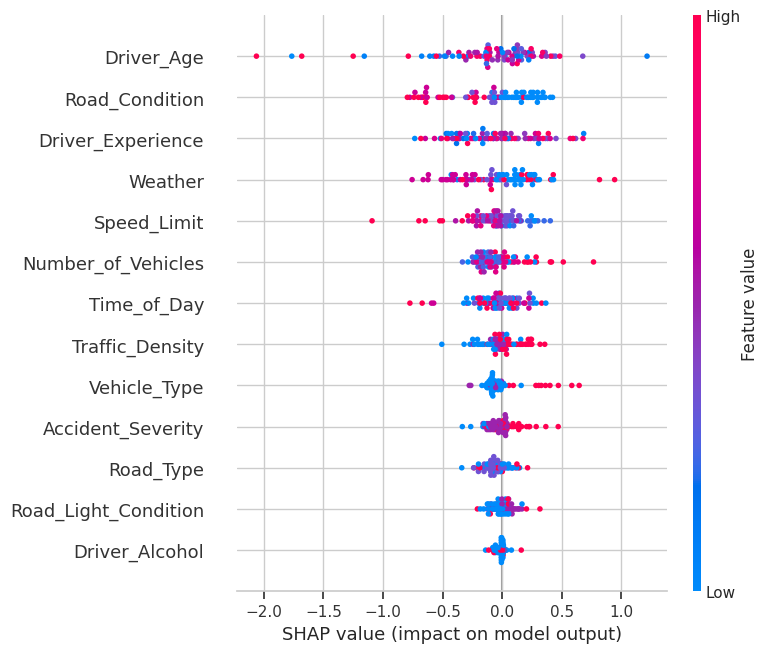


Creating Graph representation...
Graph created with nodes: 756
Graph edges: 30


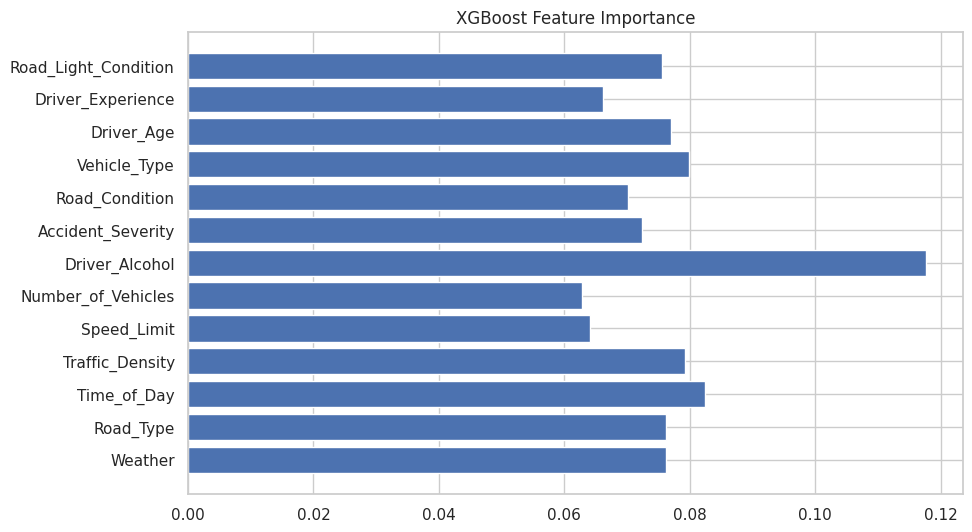


Pipeline Completed Successfully 🚀


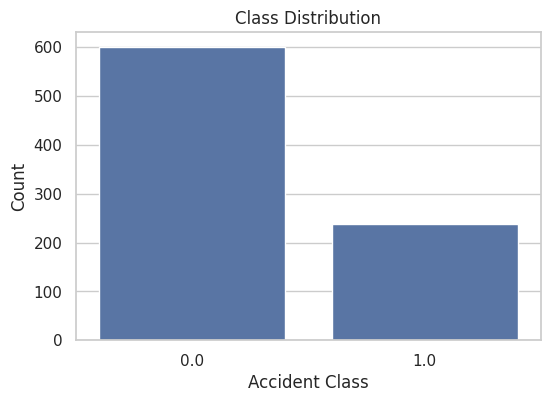

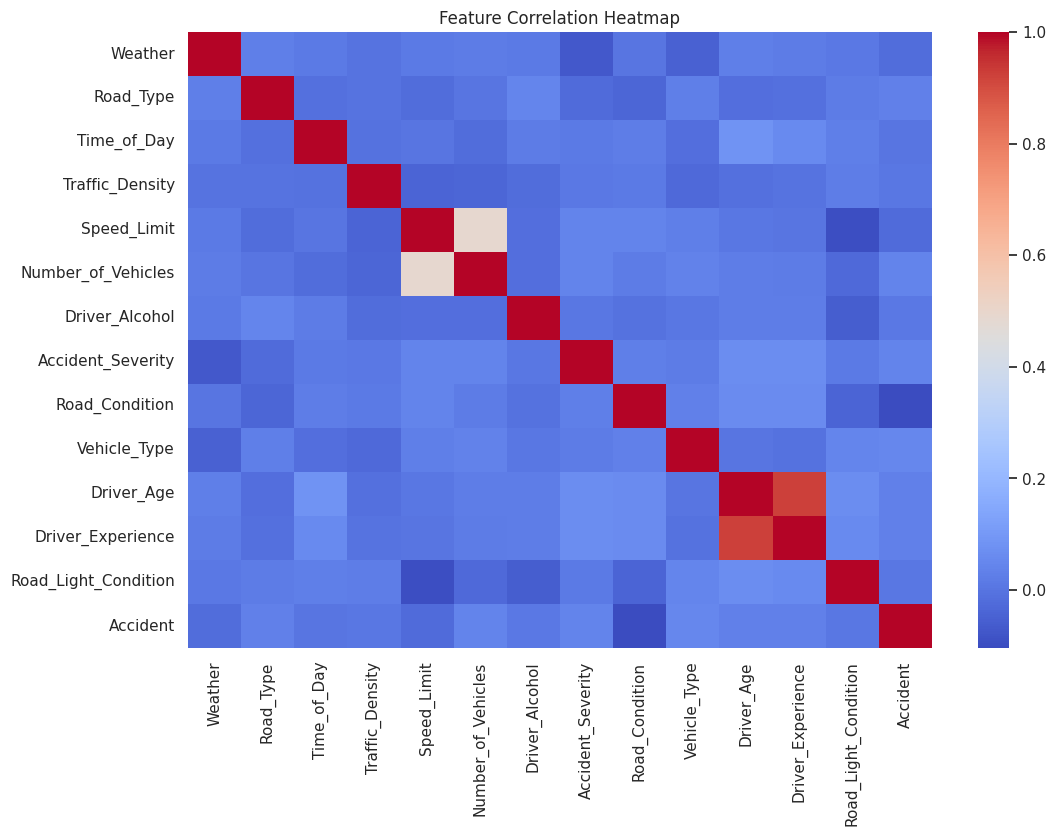

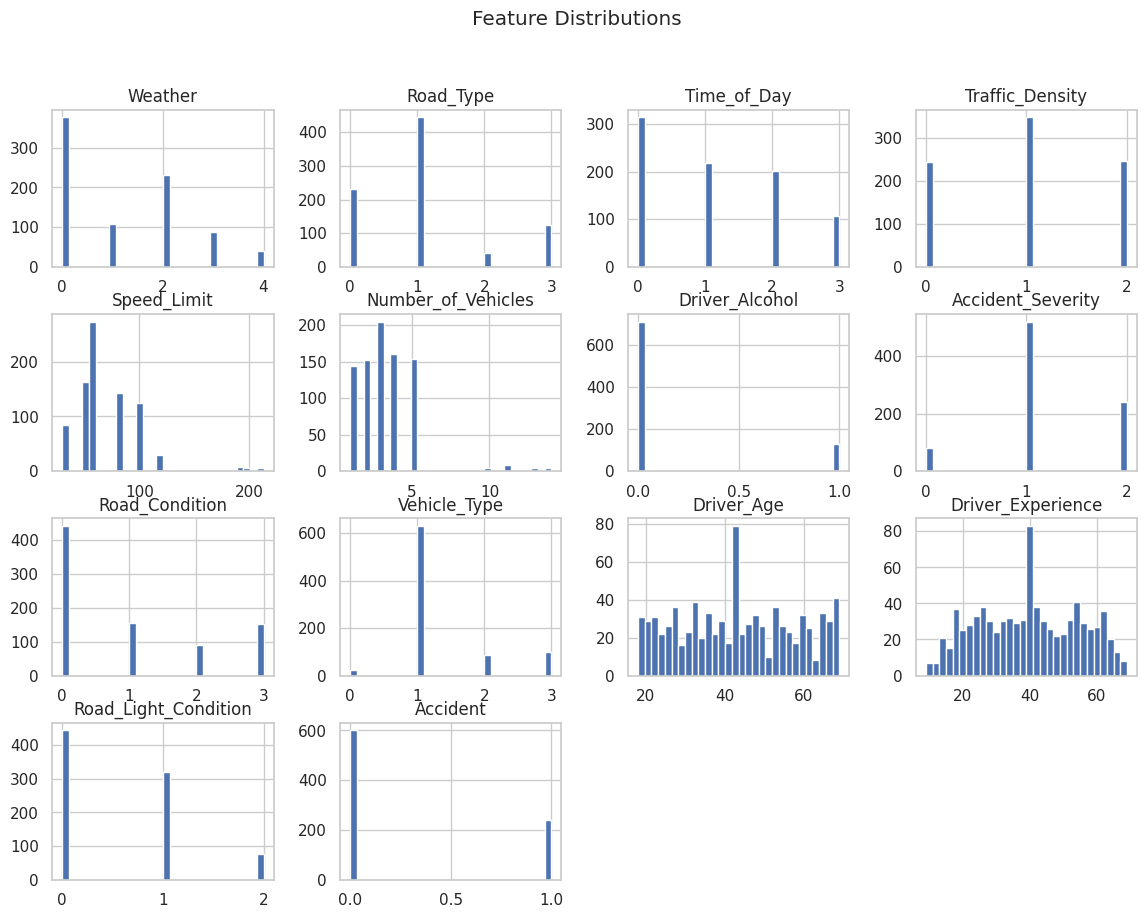

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


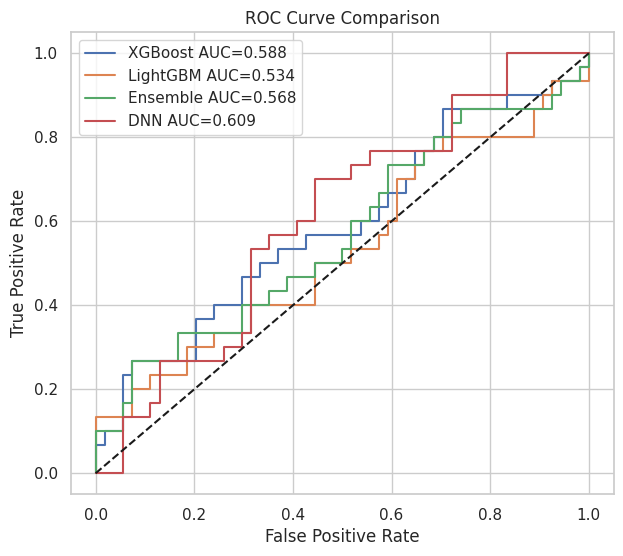

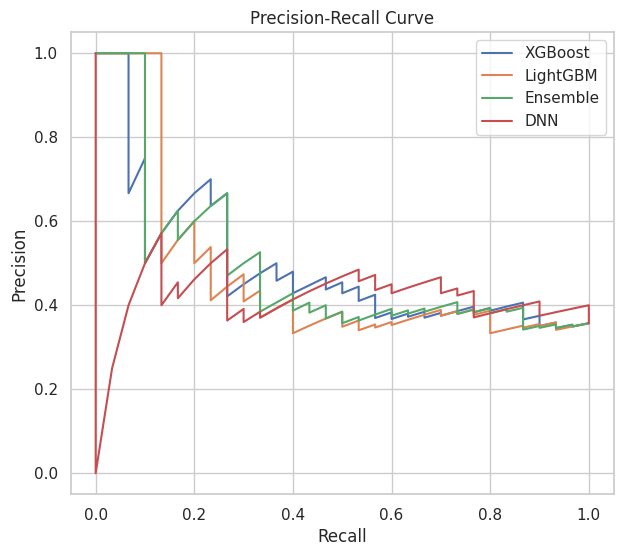

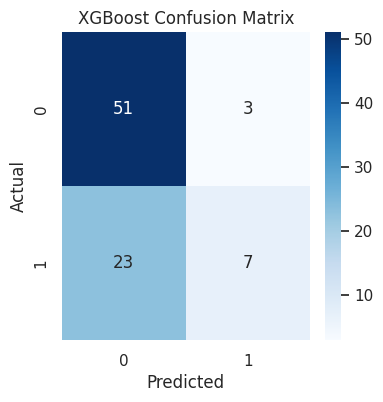

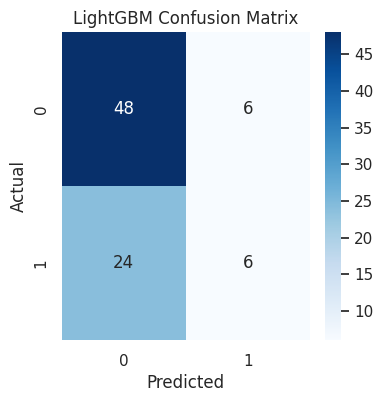

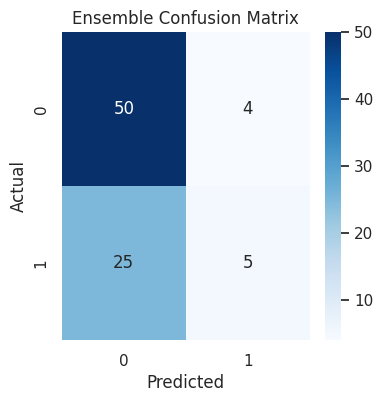

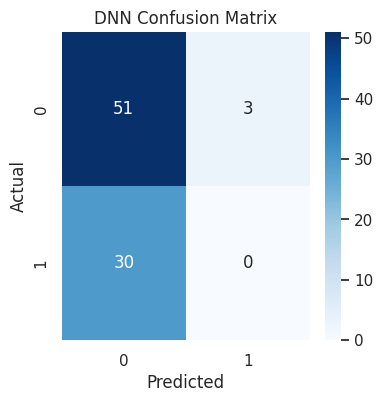

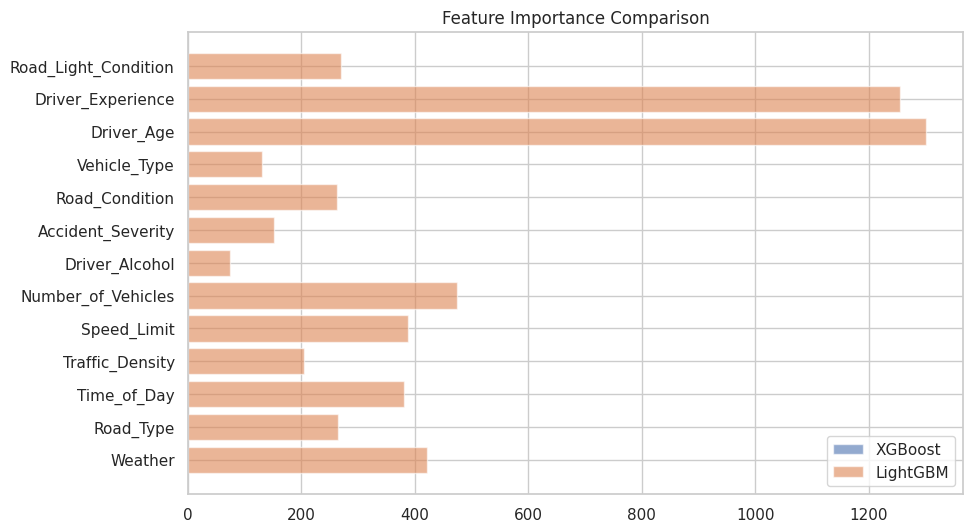

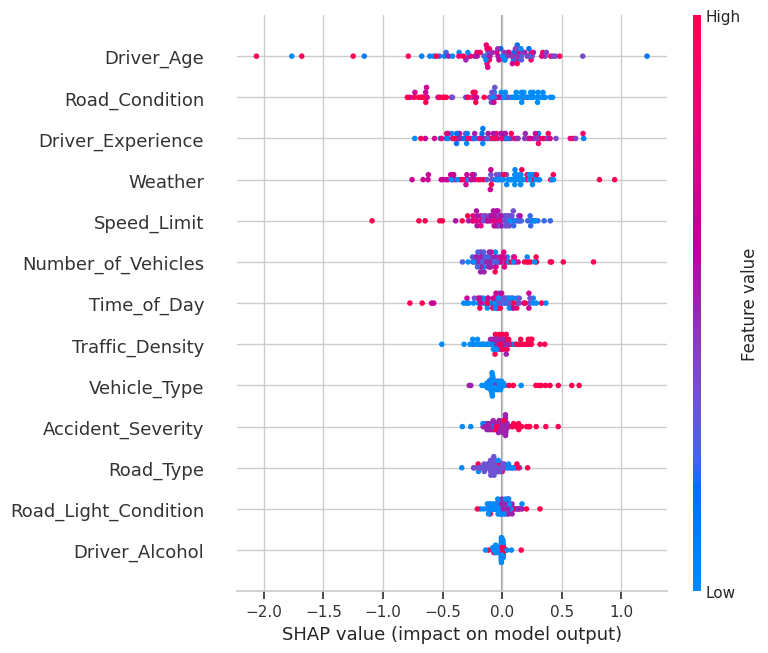

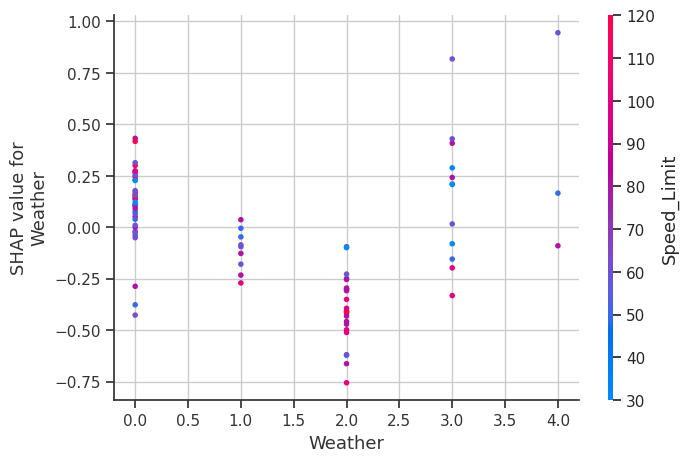

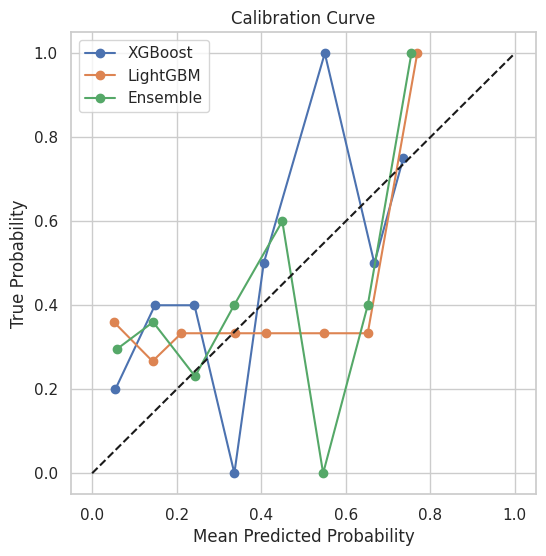

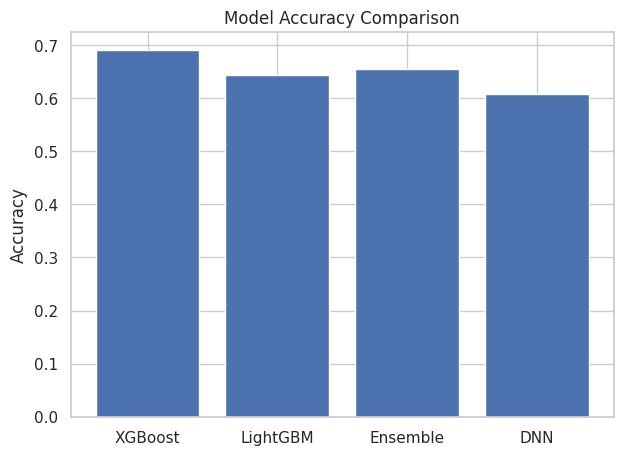

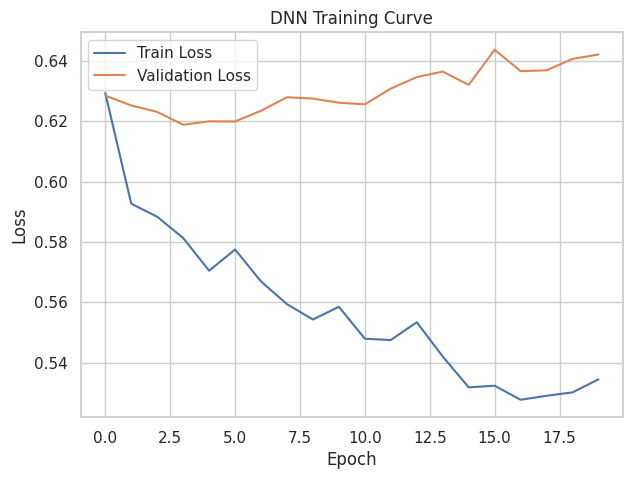

Accident
0.0    601
1.0    239
Name: count, dtype: int64


In [9]:
# ============================================
# ADVANCED ACCIDENT PREDICTION PIPELINE
# ============================================

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import VotingClassifier

import matplotlib.pyplot as plt

# Models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import shap

# Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Graph
import networkx as nx

# ============================================
# Load Dataset
# ============================================

df = pd.read_csv("https://raw.githubusercontent.com/MonikSense/Traffic_Accident/refs/heads/main/dataset_traffic_accident_prediction1.csv")

print("Dataset Loaded:", df.shape)

# ============================================
# Handle Missing Values
# ============================================

for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# ============================================
# Encode categorical variables
# ============================================

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# ============================================
# Define features and target
# ============================================

target_col = df.columns[-1]   # assumes last column is target
X = df.drop(target_col, axis=1)
y = df[target_col]

# ============================================
# Train test split
# ============================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# ============================================
# Scaling for DNN
# ============================================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ============================================
# 1️⃣ XGBOOST MODEL
# ============================================

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    random_state=42
)

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("\nXGBoost Accuracy:", accuracy_score(y_test, xgb_pred))

# ============================================
# 2️⃣ LIGHTGBM MODEL
# ============================================

lgb_model = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    random_state=42
)

lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)

print("LightGBM Accuracy:", accuracy_score(y_test, lgb_pred))

# ============================================
# 3️⃣ DEEP NEURAL NETWORK
# ============================================

dnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

dnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

dnn_model.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

dnn_pred = (dnn_model.predict(X_test_scaled) > 0.5).astype(int)

print("DNN Accuracy:", accuracy_score(y_test, dnn_pred))

# ============================================
# 4️⃣ HYBRID ENSEMBLE MODEL
# ============================================

ensemble = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model)
    ],
    voting='soft'
)

ensemble.fit(X_train, y_train)
ensemble_pred = ensemble.predict(X_test)

print("Ensemble Accuracy:", accuracy_score(y_test, ensemble_pred))

print("\nClassification Report:\n", classification_report(y_test, ensemble_pred))

# ============================================
# 5️⃣ SHAP EXPLAINABLE AI
# ============================================

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

print("Generating SHAP summary plot...")
shap.summary_plot(shap_values, X_test)

# ============================================
# 6️⃣ GRAPH-BASED PSEUDO IMPLEMENTATION
# ============================================

print("\nCreating Graph representation...")

G = nx.Graph()

# Add nodes as samples
for i in range(len(X_train)):
    G.add_node(i)

# Connect nodes based on similarity (simple threshold)
for i in range(100):  # limit for speed
    for j in range(i+1, 100):
        similarity = np.linalg.norm(X_train.iloc[i] - X_train.iloc[j])
        if similarity < 5:
            G.add_edge(i, j)

print("Graph created with nodes:", G.number_of_nodes())
print("Graph edges:", G.number_of_edges())

# ============================================
# Feature Importance Plot
# ============================================

importances = xgb_model.feature_importances_

plt.figure(figsize=(10,6))
plt.barh(X.columns, importances)
plt.title("XGBoost Feature Importance")
plt.show()

print("\nPipeline Completed Successfully 🚀")

import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix
from sklearn.calibration import calibration_curve

sns.set(style="whitegrid")

# ===============================
# 1️⃣ Class Distribution Plot
# ===============================

plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Class Distribution")
plt.xlabel("Accident Class")
plt.ylabel("Count")
plt.show()

# ===============================
# 2️⃣ Correlation Heatmap
# ===============================

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# ===============================
# 3️⃣ Feature Distribution
# ===============================

df.hist(figsize=(14,10), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

# ===============================
# 4️⃣ ROC CURVES
# ===============================

xgb_prob = xgb_model.predict_proba(X_test)[:,1]
lgb_prob = lgb_model.predict_proba(X_test)[:,1]
ensemble_prob = ensemble.predict_proba(X_test)[:,1]

dnn_prob = dnn_model.predict(X_test_scaled).ravel()

plt.figure(figsize=(7,6))

for prob, label in [
    (xgb_prob,"XGBoost"),
    (lgb_prob,"LightGBM"),
    (ensemble_prob,"Ensemble"),
    (dnn_prob,"DNN")
]:
    fpr, tpr, _ = roc_curve(y_test, prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} AUC={roc_auc:.3f}")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# ===============================
# 5️⃣ Precision Recall Curve
# ===============================

plt.figure(figsize=(7,6))

for prob, label in [
    (xgb_prob,"XGBoost"),
    (lgb_prob,"LightGBM"),
    (ensemble_prob,"Ensemble"),
    (dnn_prob,"DNN")
]:
    precision, recall, _ = precision_recall_curve(y_test, prob)
    plt.plot(recall, precision, label=label)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

# ===============================
# 6️⃣ Confusion Matrices
# ===============================

models_preds = {
    "XGBoost": xgb_pred,
    "LightGBM": lgb_pred,
    "Ensemble": ensemble_pred,
    "DNN": dnn_pred
}

for name, pred in models_preds.items():
    plt.figure(figsize=(4,4))
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ===============================
# 7️⃣ Feature Importance Comparison
# ===============================

plt.figure(figsize=(10,6))
plt.barh(X.columns, xgb_model.feature_importances_, alpha=0.6, label="XGBoost")
plt.barh(X.columns, lgb_model.feature_importances_, alpha=0.6, label="LightGBM")
plt.legend()
plt.title("Feature Importance Comparison")
plt.show()

# ===============================
# 8️⃣ SHAP SUMMARY
# ===============================

shap.summary_plot(shap_values, X_test)

# ===============================
# 9️⃣ SHAP Dependence Plot
# ===============================

shap.dependence_plot(X.columns[0], shap_values, X_test)

# ===============================
# 🔟 Calibration Curve
# ===============================

plt.figure(figsize=(6,6))

for prob, label in [
    (xgb_prob,"XGBoost"),
    (lgb_prob,"LightGBM"),
    (ensemble_prob,"Ensemble")
]:
    prob_true, prob_pred = calibration_curve(y_test, prob, n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=label)

plt.plot([0,1],[0,1],'k--')
plt.xlabel("Mean Predicted Probability")
plt.ylabel("True Probability")
plt.title("Calibration Curve")
plt.legend()
plt.show()

# ===============================
# 1️⃣1️⃣ Model Accuracy Comparison
# ===============================

accuracies = [
    accuracy_score(y_test, xgb_pred),
    accuracy_score(y_test, lgb_pred),
    accuracy_score(y_test, ensemble_pred),
    accuracy_score(y_test, dnn_pred)
]

plt.figure(figsize=(7,5))
plt.bar(["XGBoost","LightGBM","Ensemble","DNN"], accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

# ===============================
# 1️⃣2️⃣ Training Loss Curve (DNN)
# ===============================

plt.figure(figsize=(7,5))
plt.plot(dnn_model.history.history['loss'], label="Train Loss")
plt.plot(dnn_model.history.history['val_loss'], label="Validation Loss")
plt.title("DNN Training Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

print(y.value_counts())


